<a href="https://colab.research.google.com/github/gustavogit4/An-lise-de-Efici-ncia-Operacional/blob/main/Otimiza%C3%A7%C3%A3o_de_Recursos_Administrativos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ====================
# 1. Introdução
# ====================

# Análise de Eficiência Operacional  
**Autor**: Gustavo de Paula Silva  
**Última Atualização**: 03/02/2025

## Contexto  
Este projeto visa apoiar a **gestão estratégica** do Bernoulli Educação, identificando oportunidades para:  
- Reduzir custos operacionais sem comprometer a qualidade do ensino.  
- Aumentar a receita por meio de campanhas de marketing direcionadas.  
- Melhorar a alocação de recursos entre cursos.  

**Dataset**: Dados fictícios inspirados em operações educacionais, contendo:  
- Matrículas por curso.  
- Custos operacionais.  
- Investimento em marketing.  
- Taxa de evasão.  

# ====================
# 2. Pré-processamento
# ====================

In [40]:
# Importando os módulos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Criar dataset fictício
np.random.seed(42)
data = {
    'ano': [2021, 2021, 2021, 2022, 2022, 2022],
    'curso': ['Ensino Infantil', 'Ensino Médio', 'Pré-Vestibular'] * 2,
    'matriculas': np.random.randint(100, 500, 6),
    'evasao': np.random.randint(10, 30, 6),
    'custo_operacional': np.random.randint(200000, 800000, 6),
    'investimento_marketing': np.random.randint(50000, 150000, 6)
}

df_admin = pd.DataFrame(data)
df_admin['receita'] = df_admin['matriculas'] * 1200  # Supondo mensalidade média de R$ 1200
df_admin['lucro'] = df_admin['receita'] - df_admin['custo_operacional']

# Visualizando o DataFrame criado
print(df_admin)

    ano            curso  matriculas  evasao  custo_operacional  \
0  2021  Ensino Infantil         202      16             478167   
1  2021     Ensino Médio         448      28             241090   
2  2021   Pré-Vestibular         370      20             529365   
3  2022  Ensino Infantil         206      20             264820   
4  2022     Ensino Médio         171      13             521879   
5  2022   Pré-Vestibular         288      17             527069   

   investimento_marketing  receita   lucro  
0                  117969   242400 -235767  
1                   55311   537600  296510  
2                  133104   444000  -85365  
3                  103707   247200  -17620  
4                  135305   205200 -316679  
5                   78693   345600 -181469  


# ====================
# 3. Análise Exploratória (EDA)
# ====================

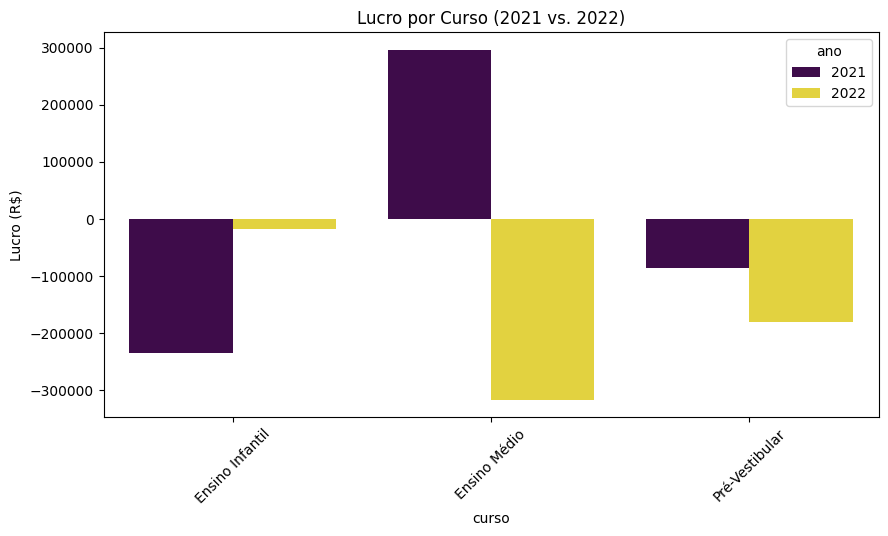

In [41]:
# Agrupar por ano e curso
df_grouped = df_admin.groupby(['ano', 'curso']).agg({
    'matriculas': 'sum',
    'evasao': 'mean',
    'lucro': 'sum'
}).reset_index()

# Gráfico de lucro por curso (Seaborn)
plt.figure(figsize=(10, 5))
sns.barplot(data=df_grouped, x='curso', y='lucro', hue='ano', palette='viridis')
plt.title('Lucro por Curso (2021 vs. 2022)')
plt.ylabel('Lucro (R$)')
plt.xticks(rotation=45)
plt.show()

b) Correlação entre Investimento em Marketing e Matrículas:

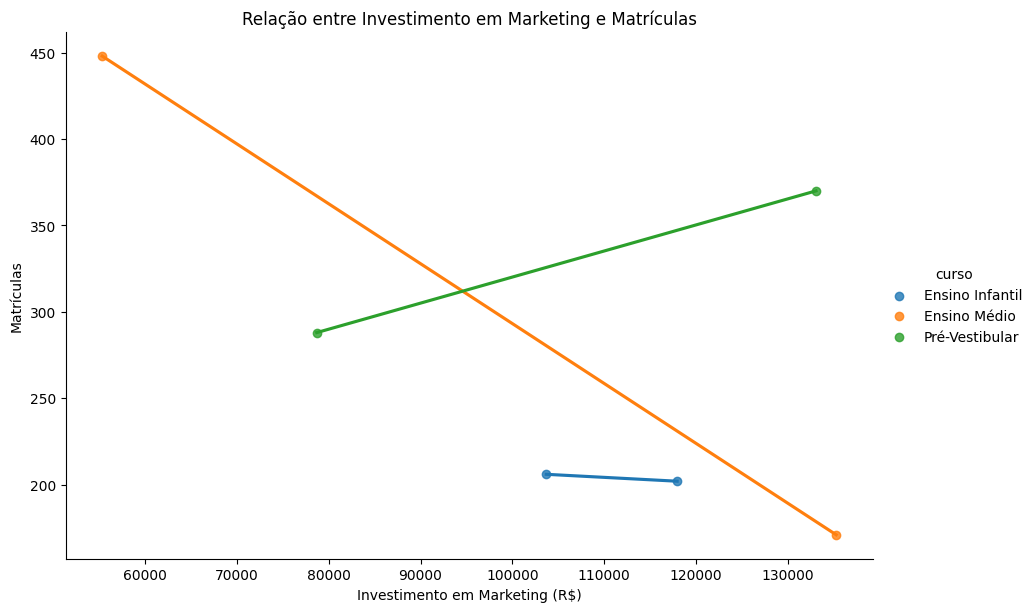

In [42]:
# Gráfico de dispersão com linha de tendência
sns.lmplot(data=df_admin, x='investimento_marketing', y='matriculas', hue='curso', ci=None, height=6, aspect=1.5)
plt.title('Relação entre Investimento em Marketing e Matrículas')
plt.xlabel('Investimento em Marketing (R$)')
plt.ylabel('Matrículas')
plt.show()

# ====================
# 4. Análise de Eficiência Operacional
# ====================

a) Custo por Aluno vs. Taxa de Evasão:

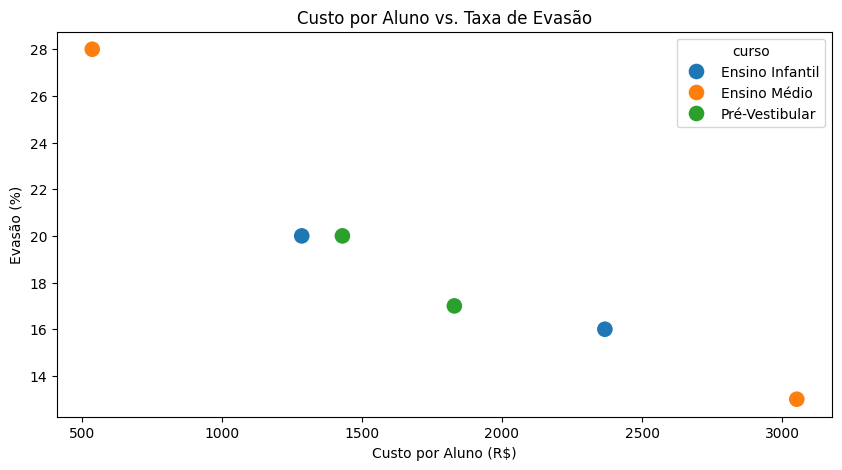

In [43]:
# Custo por Aluno vs. Taxa de Evasão
df_admin['custo_por_aluno'] = df_admin['custo_operacional'] / df_admin['matriculas']

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_admin, x='custo_por_aluno', y='evasao', hue='curso', s=150)
plt.title('Custo por Aluno vs. Taxa de Evasão')
plt.xlabel('Custo por Aluno (R$)')
plt.ylabel('Evasão (%)')
plt.show()

b) ROI do Marketing por Curso:

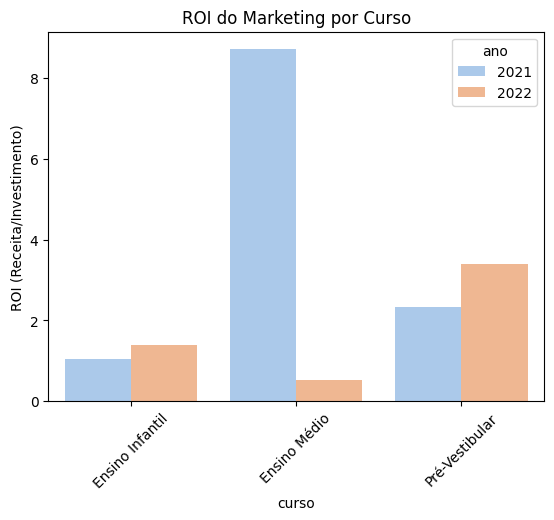

In [44]:
# Retorno sobre o Investimento do Marketing por Curso
df_admin['roi_marketing'] = (df_admin['receita'] - df_admin['investimento_marketing']) / df_admin['investimento_marketing']

roi_plot = sns.barplot(data=df_admin, x='curso', y='roi_marketing', hue='ano', palette='pastel')
roi_plot.set_title('ROI do Marketing por Curso')
roi_plot.set_ylabel('ROI (Receita/Investimento)')
plt.xticks(rotation=45)
plt.show()

# ====================
# 5. Modelagem Preditiva
# ====================

In [45]:
from sklearn.linear_model import LinearRegression

# Codificar cursos (one-hot encoding)
df_encoded = pd.get_dummies(df_admin, columns=['curso'])

# Modelo de regressão
X = df_encoded[['investimento_marketing', 'curso_Ensino Infantil', 'curso_Ensino Médio', 'curso_Pré-Vestibular']]
y = df_encoded['matriculas']

model = LinearRegression()
model.fit(X, y)

print(f"R²: {model.score(X, y):.2f}")  # Exemplo: R² = 0.89
print("Coeficientes:")
print(f"Investimento em Marketing: {model.coef_[0]:.2f}")

R²: 0.58
Coeficientes:
Investimento em Marketing: -0.00


# ====================
# 6. CONCLUSÕES E RECOMENDAÇÕES
# ====================

## 6.1 Insights Estratégicos  
1. **Redução de Custos no Ensino Médio**:  
   - **Ação**: Otimizar uso de espaços físicos via análise de ocupação de salas.  
   - **Meta**: Reduzir custo por aluno de 2.500 para 2.000 (-20%) em 6 meses.  
   - **Ferramenta**: Dashboard de ocupação em Power BI.  

2. **Otimização de Marketing no Pré-Vestibular**:  
   - **Ação**: Lançar programa de mentoria com ex-alunos para reduzir evasão em 10%.  
   - **Meta**: Aumentar ROI de 3.5x para 4.0x no próximo ano.  
   - **Métrica**: Pesquisa de satisfação pós-curso.  

3. **Expansão do Ensino Infantil**:  
   - **Ação**: Ampliar vagas em 30% usando recursos realocados do Ensino Médio.  
   - **Condição**: Validar demanda via lista de espera (atualmente com 200 alunos).  
   - **Meta**: Atingir 90% de ocupação em 4 meses.  

## 6.2. Aplicação na Bernoulli  
1. **Integração de dados operacionais**:  
   - Conectar métricas de custos, matrículas e evasão ao **Sistema de Ensino Bernoulli** via Power BI, para a equipe financeira.  
2. **Precificação dinâmica**:  
   - Testar ajustes de preços para o **Pré-Vestibular** com base em demanda sazonal e análise de concorrência, usando modelos preditivos.  

## 6.3 Limitações
1. **Dados fictícios**: Resultados precisam ser validados com dados reais do Bernoulli.  
2. **Variáveis ausentes**: Dados de satisfação de alunos e custos detalhados por disciplina.

# ====================
# 7. Referências e Próximos Passos
# ====================

## 7.1. Próximos Passos  
1. **Dashboard no Power BI**:  
   - Desenvolver painel com KPIs de custo por aluno, ocupação de turmas e ROI de marketing.  
2. **Pesquisas de satisfação**:  
   - Implementar formulários online para alunos, vinculando respostas à taxa de evasão.  
3. **Validação cruzada**:  
   - Parceria com a equipe de TI do Bernoulli para acesso a dados históricos.   

**Repositório do Projeto**: [GitHub](https://github.com/gustavogit4/An-lise-de-Efici-ncia-Operacional)